In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
covid19_confirmed_cases = pd.read_csv('Downloads\COVID19_df.csv')

In [3]:
happiness_report = pd.read_csv('Downloads/happiness_report.csv')

In [4]:
covid19_confirmed_cases.shape

(187, 2)

In [5]:
covid19_confirmed_cases.head()

,Country/Region,max infection rate
0,Afghanistan,232.0
1,Albania,34.0
2,Algeria,199.0
3,Andorra,43.0
4,Angola,5.0


In [6]:
covid19_confirmed_cases.set_index('Country/Region', inplace=True)

In [7]:
covid19_confirmed_cases.shape

(187, 1)

In [8]:
happiness_report.shape

(156, 5)

In [9]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [10]:
happiness_report.set_index('Country or region', inplace=True)

In [11]:
happiness_report.shape

(156, 4)

In [12]:
data = covid19_confirmed_cases.join(happiness_report, how='inner')

In [13]:
data.head(10)

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


In [14]:
data.corr()

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max infection rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [15]:
''''first, create a function that will return 
1- a scatter plot with a regression line,
2- the Pearson Correlation Coefficient,
3- the p-value, 
4- if there is a correlation & if the correlation is negative or positive and if it is weak, moderate, strong, or very
strong, & if it is significant or not, 
beside this function, residual plot will be drawn to evaulate whether this relationship is or no a linear relationship'''

def correlation(x, y, t):
    print(sns.regplot(x, y))
    plt.title('Correlation between max infection rate &' + ' ' + t)
    pearson_coef, p_value = stats.pearsonr(x, y)
    print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P =', p_value)
    if 0 <= pearson_coef <= 0.19:
        print('There is NO correlation')
    elif 0.20 <= pearson_coef <= 0.40:
        print('Weak positive correlation')
    elif 0.40 <= pearson_coef <= 0.59:
        print('Moderate positive correlation')
    elif 0.60 <= pearson_coef <= 0.79:
        print('Strong positive correlation')
    elif 0.80 <= pearson_coef <= 1:
        print('Very stong positive correlation')
    elif -0.19 <= pearson_coef <= -0.01:
        print('There is NO correlation')
    elif -0.39 <= pearson_coef <= -0.20:
        print('Weak negative correlation')
    elif -0.59 <= pearson_coef <= -0.40:
        print('Moderate negative correlation')
    elif -0.79 <= pearson_coef <= -0.60:
        print('Strong negative correlation')
    elif -0.80 >= pearson_coef >= -1:
        print('Very stong negative correlation')

    if p_value <= 0.05 and 0.20 <= pearson_coef <= 1:
        print('This positive correlation is significant')
    elif p_value <= 0.05 and -0.20 >= pearson_coef >= -1:
        print('This negative correlation is significant')
    elif p_value > 0.05 and 0.20 <= pearson_coef <= 1:
        print('This positive correlation is NOT significant')
    elif p_value > 0.05 and -0.20 >= pearson_coef >= -1:
        print('This negative correlation is NOT significant')

In [16]:
y = np.log(data['max infection rate']) #we need to use the max infection rate log to fit the scatterplot
GDP = data['GDP per capita']
Social_support = data['Social support']
healthy_life_expectancy = data['Healthy life expectancy']
Freedom_of_choices = data['Freedom to make life choices']

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
The Pearson Correlation Coefficient is 0.5877934046059671 with a P-value of P = 1.1839643617609705e-14
Moderate positive correlation
This positive correlation is significant


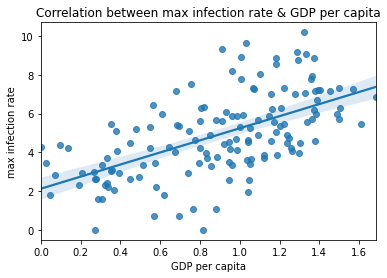

In [17]:
correlation(GDP, y, 'GDP per capita')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max infection rate'>

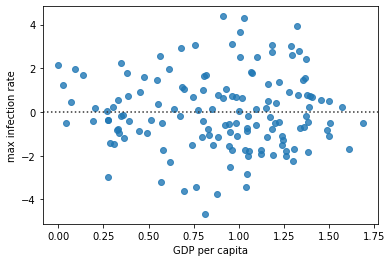

In [18]:
sns.residplot(GDP, y)

AxesSubplot(0.125,0.125;0.775x0.755)
The Pearson Correlation Coefficient is 0.410553554663816 with a P-value of P = 3.528589753399903e-07
Moderate positive correlation
This positive correlation is significant


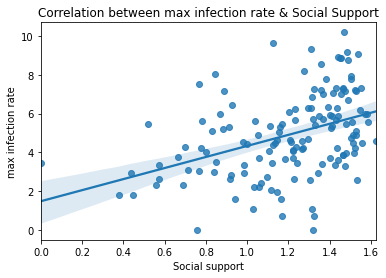

In [19]:
correlation(Social_support, y, 'Social Support')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max infection rate'>

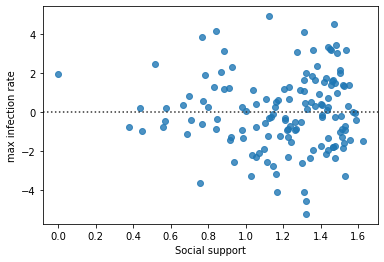

In [20]:
sns.residplot(Social_support, y)

AxesSubplot(0.125,0.125;0.775x0.755)
The Pearson Correlation Coefficient is 0.5456787753328285 with a P-value of P = 1.8185734429629742e-12
Moderate positive correlation
This positive correlation is significant


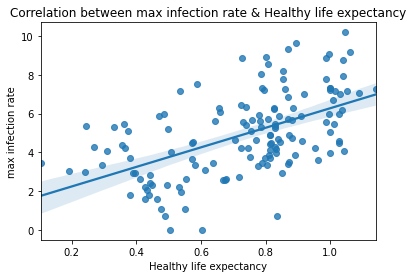

In [21]:
correlation(healthy_life_expectancy, y, 'Healthy life expectancy')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max infection rate'>

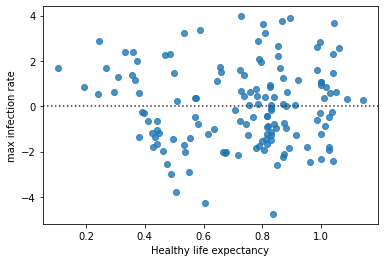

In [22]:
sns.residplot(healthy_life_expectancy, y)

AxesSubplot(0.125,0.125;0.775x0.755)
The Pearson Correlation Coefficient is 0.25641480726920485 with a P-value of P = 0.0019933917808501174
Weak positive correlation
This positive correlation is significant


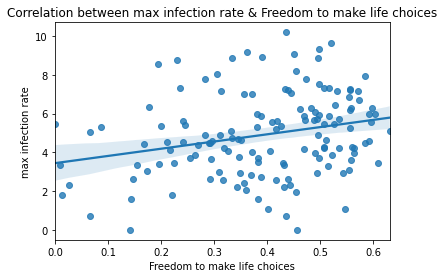

In [23]:
correlation(Freedom_of_choices, y, 'Freedom to make life choices')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max infection rate'>

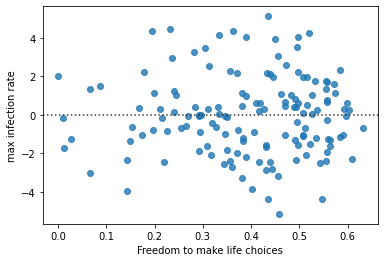

In [24]:
sns.residplot(Freedom_of_choices, y)

In [27]:
'''' according to this analysis, the max infection rate of a country positively correlated the GDP, the Social support,  
the health life expectancy (moderate correlation) and the freedom of a choice of that country.

Hence, we can state that happier countries tend to be at ​higher risk of getting COVID-19 infection.

However, this could be based since happier countries tend to be developed countries and they are more prone to COVID-19 
than developing countries'''

"' according to this analysis, the max infection rate of a country positively correlated the GDP, the Social support,  \nthe health life expectancy (moderate correlation) and the freedom of a choice of that country.\n\nHence, we can state that happier countries tend to be at \u200bhigher risk of getting COVID-19 infection.\n\nHowever, this could be based since happier countries tend to be developed countries and they are more prone to COVID-19 \nthan developing countries"

In [26]:
data.to_csv('Downloads\COVID19_Confirmed_cases&happiness_report.csv')